# Logistic Regression - Diabetes

In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("diabetes.csv")
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,52,1
3,150,66,23,94,28.1,0.167,21,0
4,150,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [4]:
df['Outcome'].value_counts()   # imbalance data  # bais data

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

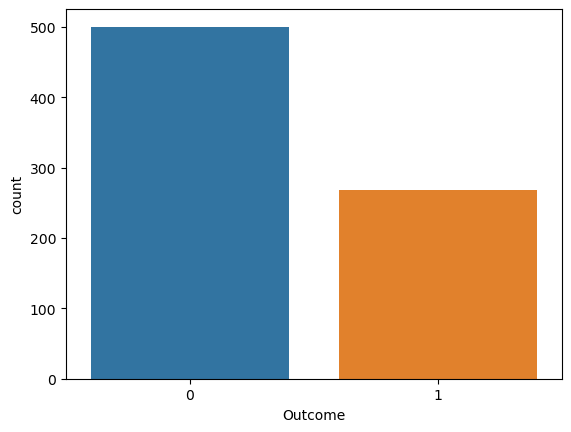

In [5]:
sns.countplot(x  = df['Outcome'])

# Train Test Split

In [6]:
x = df.drop('Outcome', axis=1)
y = df['Outcome']  # target column

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=1, stratify=y)


In [7]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [8]:
500/(500+268)

0.6510416666666666

In [9]:
y_train.value_counts()

0    375
1    201
Name: Outcome, dtype: int64

In [10]:
# without stratify
377/(377+199)

0.6545138888888888

In [11]:
# with stratify
375/(375+201)

0.6510416666666666

In [12]:
y_test.value_counts()

0    125
1     67
Name: Outcome, dtype: int64

In [13]:
125/(125+67)

0.6510416666666666

# Model training

In [14]:
# Create Instance
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

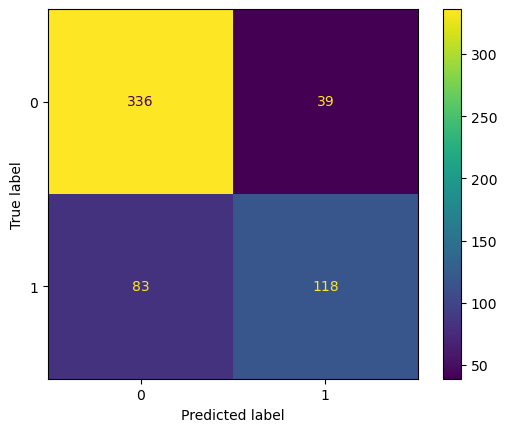

In [15]:
# Training Data
plot_confusion_matrix(model, x_train, y_train)

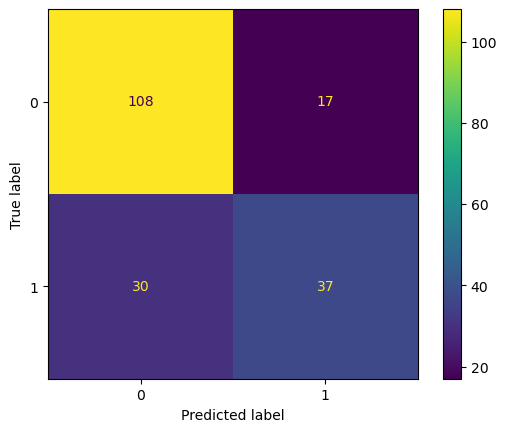

In [16]:
# Training Data
plot_confusion_matrix(model, x_test, y_test)

In [17]:
# Training Accuracy
model.score(x_train, y_train)

0.7881944444444444

In [18]:
# Testing Accuracy
model.score(x_test, y_test)

0.7552083333333334

# Model Evaluation

In [19]:
# prediction
y_pred = model.predict(x_test)
y_pred

array([0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0], dtype=int64)

In [20]:
# prediction probability
y_pred_proba = model.predict_proba(x_test)
y_pred_proba

array([[0.91636267, 0.08363733],
       [0.32428013, 0.67571987],
       [0.74017864, 0.25982136],
       [0.46076794, 0.53923206],
       [0.87524548, 0.12475452],
       [0.9781938 , 0.0218062 ],
       [0.10279795, 0.89720205],
       [0.1903076 , 0.8096924 ],
       [0.05624062, 0.94375938],
       [0.99751194, 0.00248806],
       [0.1577149 , 0.8422851 ],
       [0.54536833, 0.45463167],
       [0.91238787, 0.08761213],
       [0.28324099, 0.71675901],
       [0.57008621, 0.42991379],
       [0.87831789, 0.12168211],
       [0.48520573, 0.51479427],
       [0.93661324, 0.06338676],
       [0.45232158, 0.54767842],
       [0.89634949, 0.10365051],
       [0.93461294, 0.06538706],
       [0.80408352, 0.19591648],
       [0.84465042, 0.15534958],
       [0.81671133, 0.18328867],
       [0.87760845, 0.12239155],
       [0.22831292, 0.77168708],
       [0.36399675, 0.63600325],
       [0.94689242, 0.05310758],
       [0.63962909, 0.36037091],
       [0.61420653, 0.38579347],
       [0.

In [21]:
# Testing data
cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cnf_matrix)

print("*"*45)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:",accuracy)
print("*"*45)

clf_report = classification_report(y_test, y_pred)
print("Classification report:\n",clf_report)

Confusion Matrix:
 [[108  17]
 [ 30  37]]
*********************************************
Accuracy Score: 0.7552083333333334
*********************************************
Classification report:
               precision    recall  f1-score   support

           0       0.78      0.86      0.82       125
           1       0.69      0.55      0.61        67

    accuracy                           0.76       192
   macro avg       0.73      0.71      0.72       192
weighted avg       0.75      0.76      0.75       192



In [22]:
# Training data

# prediction
y_pred_train = model.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix:\n",cnf_matrix)

# Visualization

print("*"*45)
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy Score:",accuracy)
print("*"*45)

clf_report = classification_report(y_train, y_pred_train)
print("Classification report:\n",clf_report)

Confusion Matrix:
 [[336  39]
 [ 83 118]]
*********************************************
Accuracy Score: 0.7881944444444444
*********************************************
Classification report:
               precision    recall  f1-score   support

           0       0.80      0.90      0.85       375
           1       0.75      0.59      0.66       201

    accuracy                           0.79       576
   macro avg       0.78      0.74      0.75       576
weighted avg       0.78      0.79      0.78       576



In [23]:
# Weighted Average
#Precision
(0.80 * 0.65) +(0.75 * 0.35)

0.7825

In [24]:
# Weighted Average
#Recall
(0.90 * 0.65) +(0.59 * 0.35)

0.7915000000000001

In [25]:
# Confusion Matrix:
# Predicted Values
#  [[336  39]   Actual Values
#  [ 83 118]]   Actual Values
    
# TN = 336
# TP = 118
# FP = 39
# FN = 83

SyntaxError: invalid syntax (1344215874.py, line 1)

In [26]:
# Accuracy = TP + TN/(TP+TN+FP+FN)

Accuracy = (118+336)/(118+336+39+83)
Accuracy

0.7881944444444444

In [27]:
# Precision for class 1  --> We are considering class 1 i.e. Positive class
# Precision = TP/(TP+FP)
Precision_1 = 118/(118+39)
Precision_1

0.7515923566878981

In [28]:
# Precision for class 0  --> Consider Negative class
# Precision = TN/(TN+FN)
Precision_0 = 336/(336+83)
Precision_0

0.801909307875895

# AUC-ROC Curve

In [29]:
# prediction probability
y_pred_proba = model.predict_proba(x_train)
y_pred_proba[:,1]  # We are getting cklass 1 probability

fpr, tpr, thresh = roc_curve(y_train, y_pred_proba[:,1])
thresh

array([1.99272552, 0.99272552, 0.97542289, 0.96591652, 0.95922174,
       0.91750859, 0.91653835, 0.90790654, 0.89684045, 0.81404227,
       0.8056952 , 0.79994734, 0.7972925 , 0.77792583, 0.77731446,
       0.772829  , 0.7697499 , 0.76622723, 0.76444427, 0.76339967,
       0.75949177, 0.75692479, 0.7506523 , 0.74135654, 0.73190356,
       0.72943528, 0.72934919, 0.71544862, 0.71069172, 0.69338437,
       0.68828441, 0.68281595, 0.67944581, 0.67216837, 0.66874108,
       0.6656969 , 0.66308985, 0.64849259, 0.64827151, 0.63825981,
       0.63457558, 0.6290556 , 0.61662191, 0.61119773, 0.60701154,
       0.59989203, 0.59164584, 0.58768307, 0.58485243, 0.58039752,
       0.5759626 , 0.55404803, 0.55322821, 0.53787721, 0.53663669,
       0.53061606, 0.52928549, 0.51346379, 0.51140977, 0.51017869,
       0.50621615, 0.50350169, 0.49851434, 0.49777746, 0.49324984,
       0.49219427, 0.48504663, 0.48206974, 0.47928012, 0.47685856,
       0.47639109, 0.46303398, 0.45996873, 0.4527099 , 0.44428

Text(0.5, 1.0, 'Reciever Operating Characteristics')

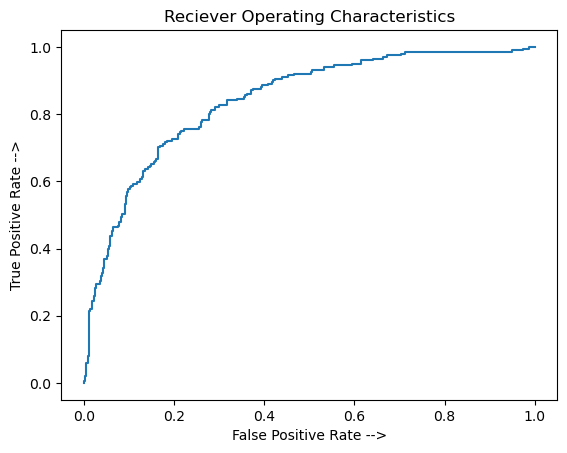

In [30]:
# Plot AUC-ROC
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate -->")
plt.ylabel("True Positive Rate -->")
plt.title("Reciever Operating Characteristics")

In [37]:
import json 
with open('DiabetesJson.json','w') as f:
    json.dump({'column_names':[df.columns]},f)

TypeError: Object of type Index is not JSON serializable

In [39]:
df.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [33]:
import pickle 
with open('Diabetes.pkl', 'wb') as f:
    pickle.dump(model, f)

In [40]:
df.iloc[1,:]

Glucose                     85.000
BloodPressure               66.000
SkinThickness               29.000
Insulin                      0.000
BMI                         26.600
DiabetesPedigreeFunction     0.351
Age                         31.000
Outcome                      0.000
Name: 1, dtype: float64